In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import kagglehub

In [2]:
# Download dataset from KaggleHub
path = kagglehub.dataset_download("juhibhojani/house-price")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/house-price


In [3]:
# Load the dataset (assume the main CSV file is 'train.csv')
df = pd.read_csv(f"/kaggle/input/house-price/house_prices.csv")
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [4]:
# Display initial shape
print("Initial shape:", df.shape)

Initial shape: (187531, 21)


In [5]:
# Show all column names
print(df.columns.tolist())

['Index', 'Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']


In [6]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Rename columns for easier access
df.rename(columns={
    'Amount(in rupees)': 'Amount_in_rupees',
    'Price (in rupees)': 'Price_in_repees',
    'Carpet Area': 'Carpet_area_in_sqft'
}, inplace=True)

In [8]:
# Drop irrelevant columns if they exist
columns_to_drop = ['Index', 'Title', 'Description', 'Dimensions', 'Status']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [9]:
# Display initial shape
print("After rename and drop columns shape:", df.shape)
# Show all column names
print(df.columns.tolist())

After rename and drop columns shape: (187531, 16)
['Amount_in_rupees', 'Price_in_repees', 'location', 'Carpet_area_in_sqft', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Plot Area']


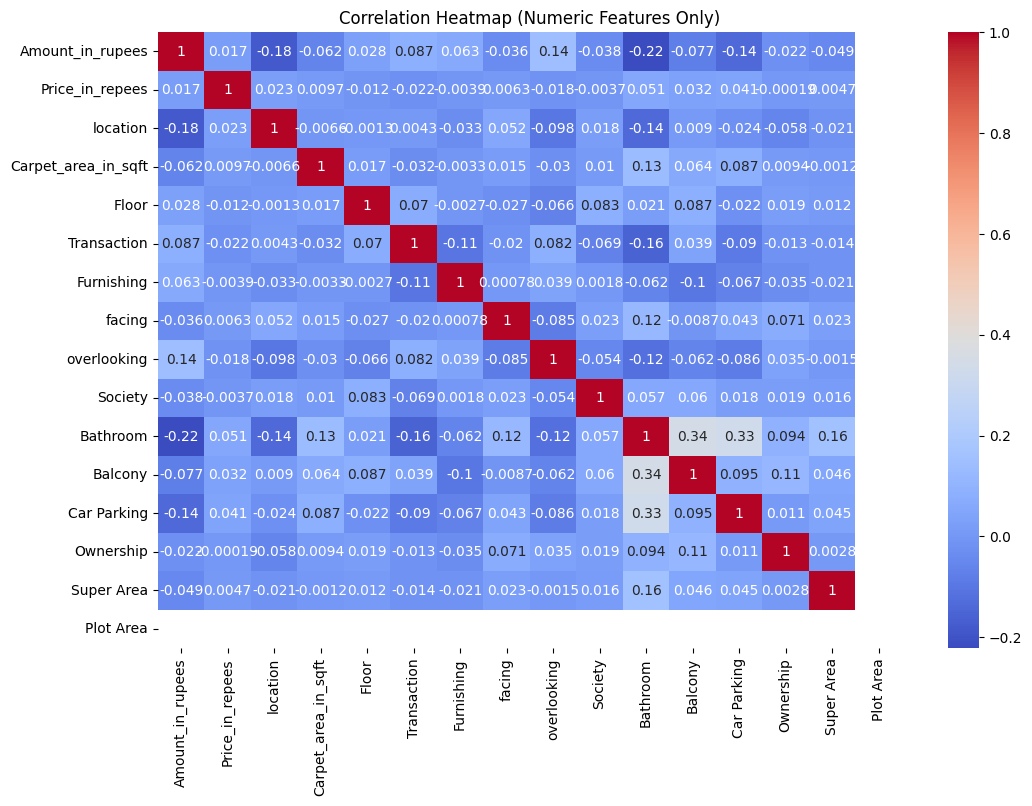

In [23]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [12]:
# Convert string-based numeric columns to float
numeric_columns = ['Amount_in_rupees', 'Price_in_repees', 'Carpet_area_in_sqft', 'Super Area', 'Plot Area']
for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '').str.extract(r'(\d+\.?\d*)')[0]
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Handle missing values
# Fill numeric columns with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-13-20af6221e4c9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-13-20af6221e4c9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [14]:
# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Final shape after cleaning
print("Final shape after cleaning:", df.shape)

# Display cleaned data sample
df.head()

Final shape after cleaning: (187531, 16)


,Amount_in_rupees,Price_in_repees,location,Carpet_area_in_sqft,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Plot Area
0,42.0,6000.0,67,500.0,40,3,2,0,7,8805,0,2,0,1,1250.0,NaN
1,98.0,13799.0,67,473.0,551,3,1,0,0,2273,2,2,2,1,1250.0,NaN
2,1.4,17500.0,67,779.0,58,3,2,0,0,8972,2,2,0,1,1250.0,NaN
3,25.0,6034.0,67,530.0,24,3,2,0,7,3292,0,0,0,1,1250.0,NaN
4,1.6,18824.0,67,635.0,381,3,2,7,1,9288,2,2,0,0,1250.0,NaN


In [15]:
# Display  shape after cleanup
print("Final shape after preprocessing:", df.shape)
# Show all column names
print(df.columns.tolist())

Final shape after preprocessing: (187531, 16)
['Amount_in_rupees', 'Price_in_repees', 'location', 'Carpet_area_in_sqft', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Plot Area']


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
features = [
    'Carpet_area_in_sqft', 'Floor', 'Transaction', 'Furnishing',
    'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership'
]
target = 'Price_in_repees'

# Convert to numeric
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')

# Fill missing values with median
df[features] = df[features].fillna(df[features].median())
df[target] = df[target].fillna(df[target].median())

# Prepare data
X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [19]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}")

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Ridge Regression", y_test, ridge_preds)
evaluate_model("Random Forest", y_test, rf_preds)

Linear Regression - MSE: 794499003.61, RMSE: 28186.86
Ridge Regression - MSE: 794499004.89, RMSE: 28186.86
Random Forest - MSE: 839164292.78, RMSE: 28968.33


Linear Regression - MSE: 794499003.61, RMSE: 28186.86
Ridge Regression - MSE: 794499004.89, RMSE: 28186.86
Random Forest - MSE: 839164292.78, RMSE: 28968.33


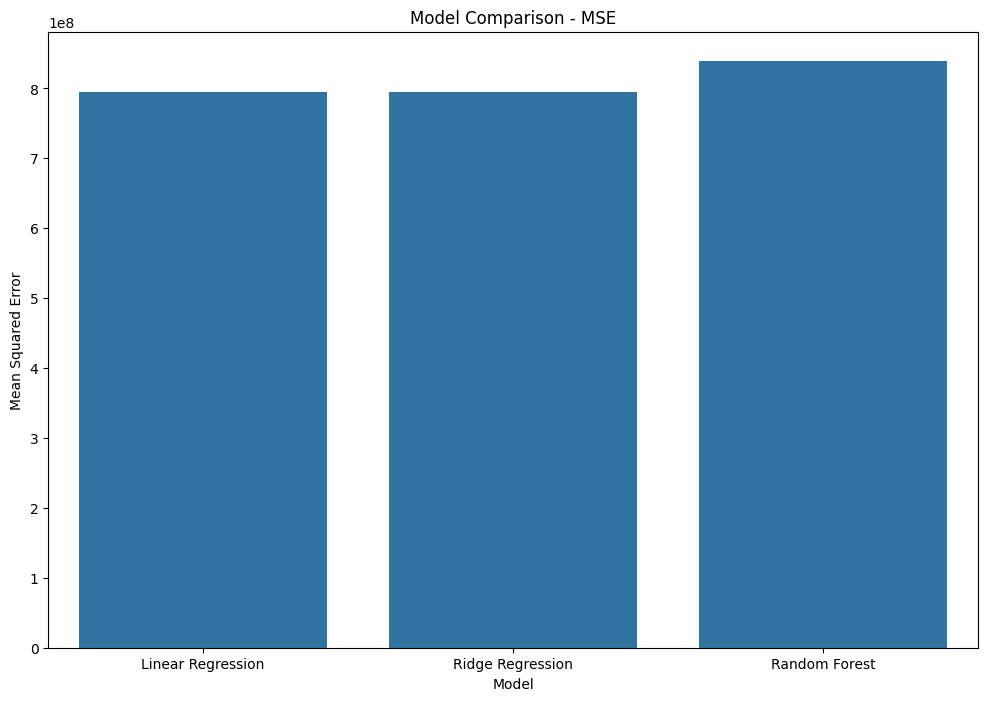

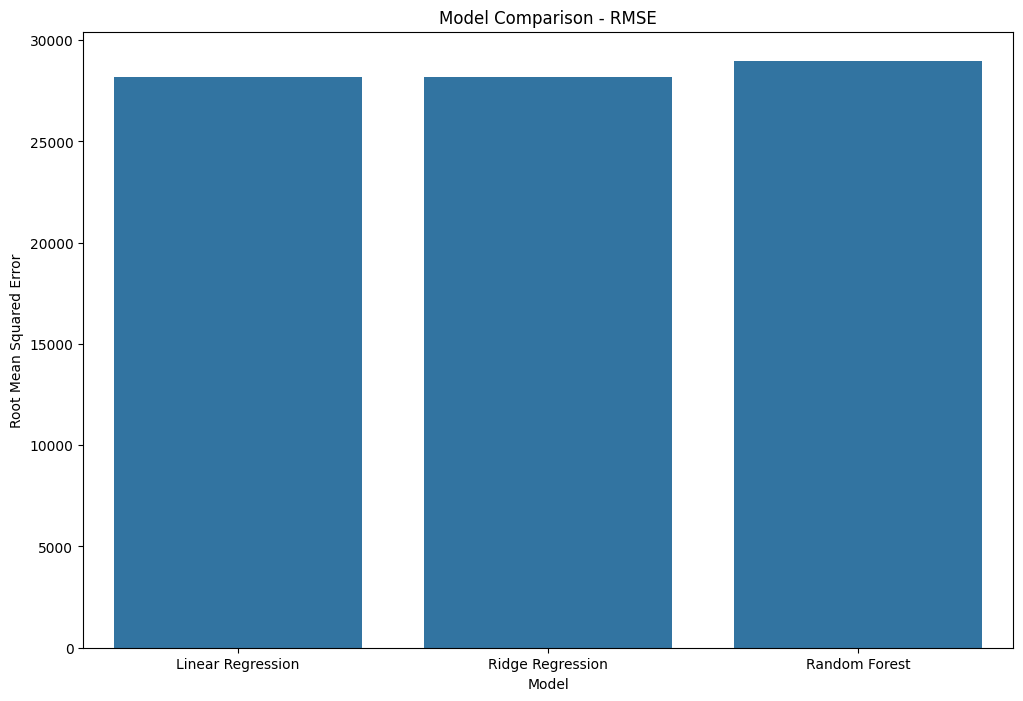

In [22]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}")
    return mse, rmse

# Evaluate each model and store the results
lr_mse, lr_rmse = evaluate_model("Linear Regression", y_test, lr_preds)
ridge_mse, ridge_rmse = evaluate_model("Ridge Regression", y_test, ridge_preds)
rf_mse, rf_rmse = evaluate_model("Random Forest", y_test, rf_preds)

# Store the metrics in a dictionary
metrics = {
    'Model': ["Linear Regression", "Ridge Regression", "Random Forest"],
    'MSE': [lr_mse, ridge_mse, rf_mse],
    'RMSE': [lr_rmse, ridge_rmse, rf_rmse]
}

# Create a pandas DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics)

# Plot MSE
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='MSE', data=metrics_df)
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='RMSE', data=metrics_df)
plt.title('Model Comparison - RMSE')
plt.ylabel('Root Mean Squared Error')
plt.show()